<a href="https://colab.research.google.com/github/AdnanSakal/Image_Classification_/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import os
import random

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "masoudnickparvar/brain-tumor-mri-dataset"

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 97% 144M/149M [00:00<00:00, 176MB/s]
100% 149M/149M [00:01<00:00, 155MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/brain-tumor-mri-dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
class_names = sorted(os.listdir("/content/Testing"))
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
for directory,dirpath,filename in os.walk("/content/Training"):
  print(f"there are {len(dirpath)} sub_directory and {len(filename)} images in {directory}")

there are 4 sub_directory and 0 images in /content/Training
there are 0 sub_directory and 1595 images in /content/Training/notumor
there are 0 sub_directory and 1321 images in /content/Training/glioma
there are 0 sub_directory and 1457 images in /content/Training/pituitary
there are 0 sub_directory and 1339 images in /content/Training/meningioma


In [ ]:
for directory,dirpath,filename in os.walk("/content/Testing"):
  print(f"there are {len(dirpath)} sub_directory and {len(filename)} images in {directory}")

there are 4 sub_directory and 0 images in /content/Testing
there are 0 sub_directory and 405 images in /content/Testing/notumor
there are 0 sub_directory and 300 images in /content/Testing/glioma
there are 0 sub_directory and 300 images in /content/Testing/pituitary
there are 0 sub_directory and 306 images in /content/Testing/meningioma


In [ ]:
import matplotlib.image as mpimg
def plot_image_from_dir(dir):
  for i in range(4):
    plt.subplot(2,2,i+1)
    sub_dir = random.choice(os.listdir(dir))
    image = random.choice(os.listdir(os.path.join(dir,sub_dir)))
    image_read = mpimg.imread(os.path.join(dir,sub_dir,image))
    print(image_read.shape)
    plt.imshow(image_read,cmap = plt.cm.gray)
    plt.title(sub_dir)
    plt.axis(False)

(225, 225, 3)
(1019, 1149, 3)
(396, 411, 3)
(225, 225, 3)


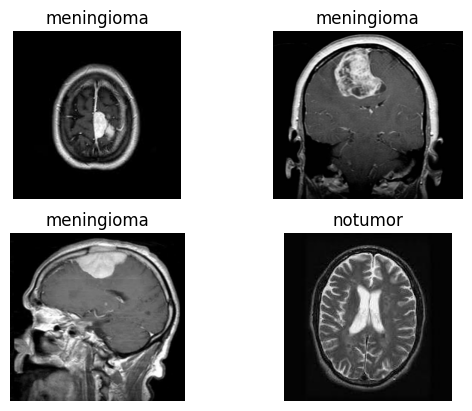

In [ ]:
plot_image_from_dir("/content/Testing")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/Training"
test_dir = "/content/Testing"

train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_data_gen.flow_from_directory(directory = train_dir,
                                                color_mode = "grayscale",
                                                target_size = [224,224],
                                                class_mode = "categorical"
                                                )

test_data = test_data_gen.flow_from_directory(directory = test_dir,
                                                color_mode = "grayscale",
                                                target_size = [224,224],
                                                class_mode = "categorical",
                                                shuffle = False
                                                )

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
image,label = train_data[0]
print(image.shape),print(label.shape)

(32, 224, 224, 1)
(32, 4)


(None, None)

(224, 224, 1)


Text(0.5, 1.0, 'notumor')

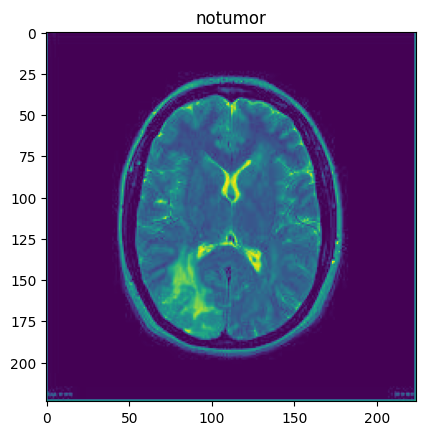

In [ ]:
print(image[0].shape)
plt.imshow(image[0])
plt.title(class_names[label[0].argmax(-1)])

In [ ]:
input = tf.keras.layers.Input(shape= [224,224,1])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128,activation = "relu")(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_0 = tf.keras.Model(input,output)

model_0.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )

his_0 = model_0.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join("checkpoint.ckpt/model_0"),
                                                                    save_best_only = True
                                                                    )]
                    )

Epoch 1/10
179/179 [==============================] - 22s 92ms/step - loss: 0.6113 - accuracy: 0.7728 - val_loss: 0.3461 - val_accuracy: 0.8680
Epoch 2/10
179/179 [==============================] - 15s 84ms/step - loss: 0.1932 - accuracy: 0.9307 - val_loss: 0.2261 - val_accuracy: 0.9237
Epoch 3/10
179/179 [==============================] - 15s 81ms/step - loss: 0.0846 - accuracy: 0.9708 - val_loss: 0.1518 - val_accuracy: 0.9481
Epoch 4/10
179/179 [==============================] - 15s 81ms/step - loss: 0.0450 - accuracy: 0.9844 - val_loss: 0.1379 - val_accuracy: 0.9580
Epoch 5/10
179/179 [==============================] - 13s 74ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.1822 - val_accuracy: 0.9497
Epoch 6/10
179/179 [==============================] - 13s 75ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.1639 - val_accuracy: 0.9634
Epoch 7/10
179/179 [==============================] - 13s 74ms/step - loss: 0.0069 - accuracy: 0.9984 - val_loss: 0.1726 - val_accuracy:

In [ ]:
train_data

In [ ]:
def plot_loss_curve(his):
  loss = his.history["loss"]
  val_loss = his.history["val_loss"]
  acc = his.history["accuracy"]
  val_acc = his.history["val_accuracy"]

  plt.plot(loss,label = "loss")
  plt.plot(val_loss,label = "val_loss")
  plt.xlabel("epoch")
  plt.title("loss")
  plt.legend()

  plt.figure()

  plt.plot(acc,label = "acc")
  plt.plot(val_acc,label = "val_acc")
  plt.xlabel("epoch")
  plt.title("accuracy")
  plt.legend()


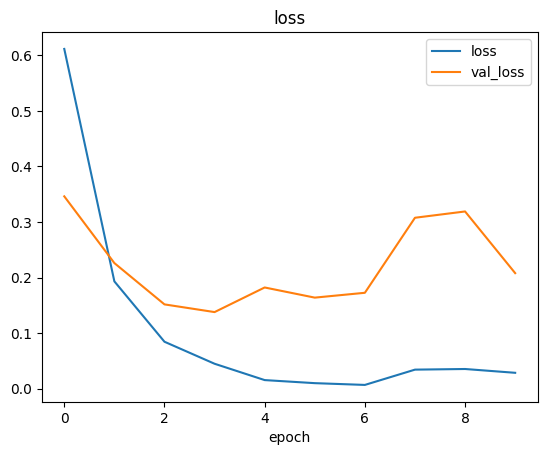

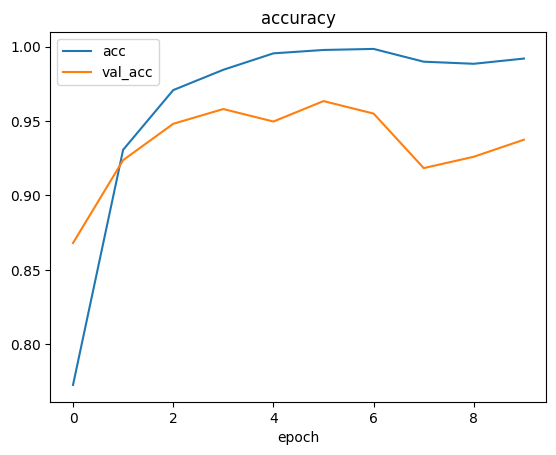

In [ ]:
plot_loss_curve(his_0)

In [ ]:
input = tf.keras.layers.Input(shape=[224,224,1])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64,activation = "relu")(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_1 = tf.keras.Model(input,output)
model_1.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_1 = model_1.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_1",
                                                                   save_best_only =True
                                                                   )
                    )

Epoch 1/10
179/179 [==============================] - 16s 86ms/step - loss: 1.0364 - accuracy: 0.7456 - val_loss: 0.3830 - val_accuracy: 0.8711
Epoch 2/10
179/179 [==============================] - 19s 106ms/step - loss: 0.2473 - accuracy: 0.9104 - val_loss: 0.2269 - val_accuracy: 0.9161
Epoch 3/10
179/179 [==============================] - 16s 88ms/step - loss: 0.1066 - accuracy: 0.9685 - val_loss: 0.2071 - val_accuracy: 0.9283
Epoch 4/10
179/179 [==============================] - 17s 96ms/step - loss: 0.0442 - accuracy: 0.9904 - val_loss: 0.1619 - val_accuracy: 0.9420
Epoch 5/10
179/179 [==============================] - 12s 68ms/step - loss: 0.0210 - accuracy: 0.9967 - val_loss: 0.1625 - val_accuracy: 0.9451
Epoch 6/10
179/179 [==============================] - 13s 73ms/step - loss: 0.0122 - accuracy: 0.9979 - val_loss: 0.1652 - val_accuracy: 0.9436
Epoch 7/10
179/179 [==============================] - 14s 76ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1684 - val_accuracy

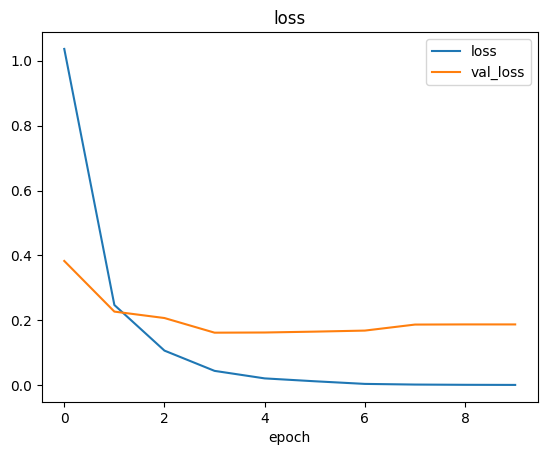

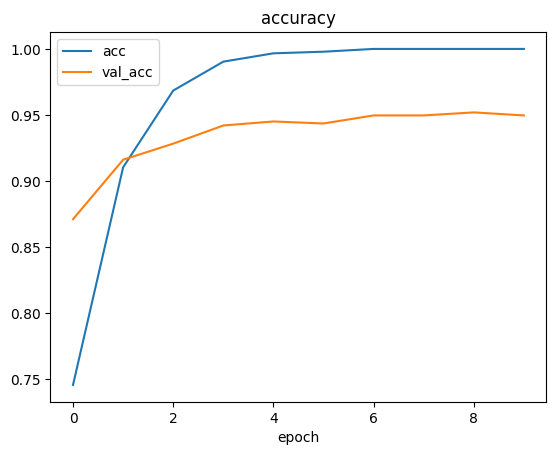

In [ ]:
plot_loss_curve(his_1)

In [ ]:
model_2 = tf.keras.layers.Input(shape = [224,224,1])
x = tf.keras.layers.Conv2D(32,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_2 = tf.keras.Model(input,output)
model_2.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )

his_2 = model_2.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_2",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
179/179 [==============================] - 14s 69ms/step - loss: 0.8008 - accuracy: 0.7467 - val_loss: 0.3780 - val_accuracy: 0.8581
Epoch 2/10
179/179 [==============================] - 12s 65ms/step - loss: 0.2164 - accuracy: 0.9275 - val_loss: 0.2225 - val_accuracy: 0.9252
Epoch 3/10
179/179 [==============================] - 12s 65ms/step - loss: 0.0994 - accuracy: 0.9732 - val_loss: 0.1994 - val_accuracy: 0.9428
Epoch 4/10
179/179 [==============================] - 12s 65ms/step - loss: 0.0459 - accuracy: 0.9921 - val_loss: 0.1624 - val_accuracy: 0.9436
Epoch 5/10
179/179 [==============================] - 11s 64ms/step - loss: 0.0237 - accuracy: 0.9977 - val_loss: 0.1718 - val_accuracy: 0.9420
Epoch 6/10
179/179 [==============================] - 11s 64ms/step - loss: 0.0121 - accuracy: 0.9996 - val_loss: 0.1654 - val_accuracy: 0.9466
Epoch 7/10
179/179 [==============================] - 11s 63ms/step - loss: 0.0076 - accuracy: 0.9998 - val_loss: 0.1911 - val_accuracy:

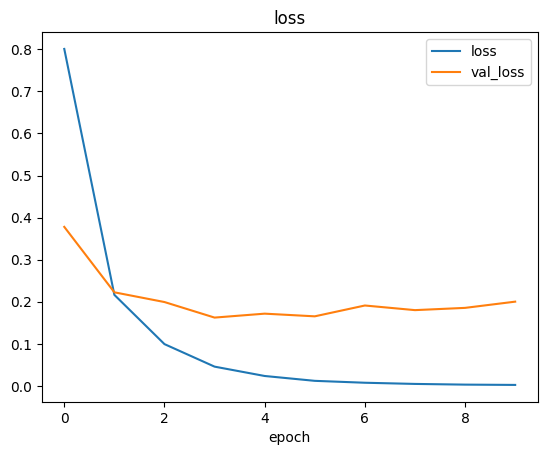

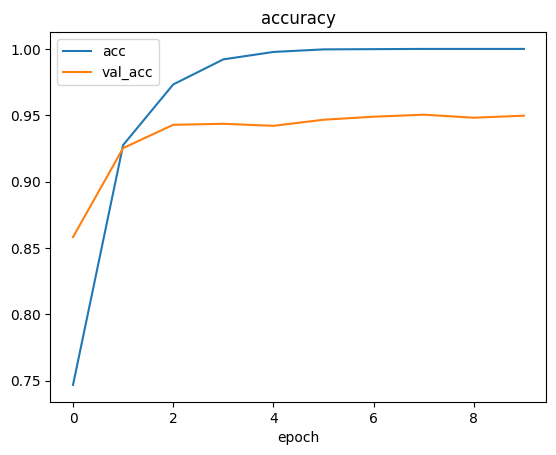

In [ ]:
plot_loss_curve(his_2)

In [ ]:
input = tf.keras.layers.Input(shape=[224,224,1])
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(32,activation = "relu")(x)
x = tf.keras.layers.Dense(32,activation = "relu")(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_3 = tf.keras.Model(input,output)
model_3.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_3 = model_3.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_3",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
179/179 [==============================] - 12s 61ms/step - loss: 0.8719 - accuracy: 0.6611 - val_loss: 0.6682 - val_accuracy: 0.7384
Epoch 2/10
179/179 [==============================] - 11s 61ms/step - loss: 0.5800 - accuracy: 0.7777 - val_loss: 0.5658 - val_accuracy: 0.8032
Epoch 3/10
179/179 [==============================] - 10s 57ms/step - loss: 0.4799 - accuracy: 0.8207 - val_loss: 0.6086 - val_accuracy: 0.7727
Epoch 4/10
179/179 [==============================] - 10s 58ms/step - loss: 0.4082 - accuracy: 0.8458 - val_loss: 0.5952 - val_accuracy: 0.7635
Epoch 5/10
179/179 [==============================] - 11s 62ms/step - loss: 0.3381 - accuracy: 0.8683 - val_loss: 0.5150 - val_accuracy: 0.8124
Epoch 6/10
179/179 [==============================] - 10s 56ms/step - loss: 0.3150 - accuracy: 0.8855 - val_loss: 0.4962 - val_accuracy: 0.8345
Epoch 7/10
179/179 [==============================] - 11s 59ms/step - loss: 0.3466 - accuracy: 0.8748 - val_loss: 0.4325 - val_accuracy:

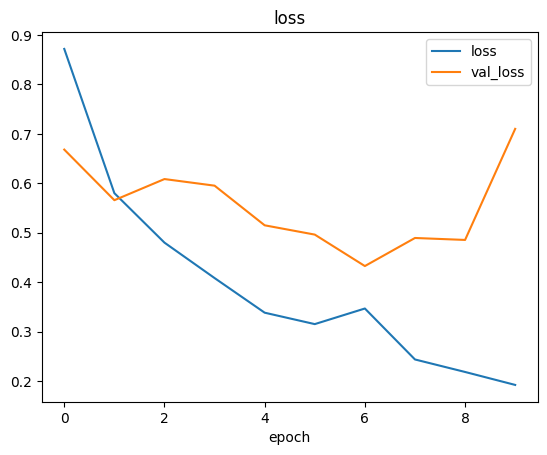

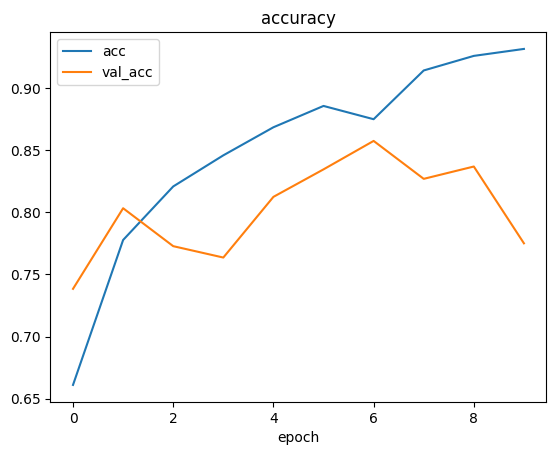

In [ ]:
plot_loss_curve(his_3)

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,1])
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(32,activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(16,activation = "relu")(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_4 = tf.keras.Model(input,output)
model_4.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_4 = model_4.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_4",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
179/179 [==============================] - 13s 61ms/step - loss: 1.4284 - accuracy: 0.3057 - val_loss: 1.3145 - val_accuracy: 0.3936
Epoch 2/10
179/179 [==============================] - 11s 60ms/step - loss: 1.3045 - accuracy: 0.3251 - val_loss: 1.2544 - val_accuracy: 0.4783
Epoch 3/10
179/179 [==============================] - 11s 60ms/step - loss: 1.2733 - accuracy: 0.3407 - val_loss: 1.2032 - val_accuracy: 0.4821
Epoch 4/10
179/179 [==============================] - 10s 55ms/step - loss: 1.2656 - accuracy: 0.3451 - val_loss: 1.2038 - val_accuracy: 0.5027
Epoch 5/10
179/179 [==============================] - 11s 62ms/step - loss: 1.2573 - accuracy: 0.3524 - val_loss: 1.1948 - val_accuracy: 0.4729
Epoch 6/10
179/179 [==============================] - 11s 61ms/step - loss: 1.2456 - accuracy: 0.3559 - val_loss: 1.1332 - val_accuracy: 0.5202
Epoch 7/10
179/179 [==============================] - 11s 61ms/step - loss: 1.2531 - accuracy: 0.3521 - val_loss: 1.1289 - val_accuracy:

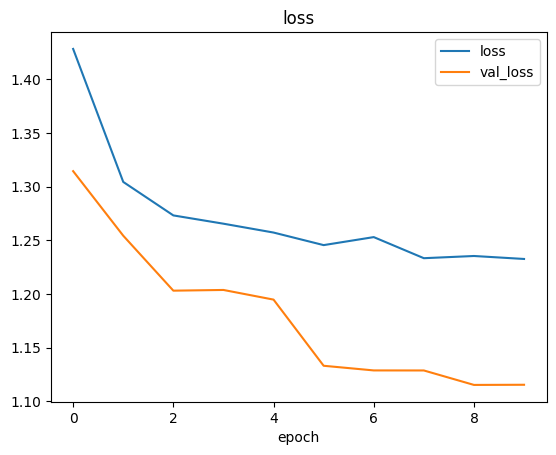

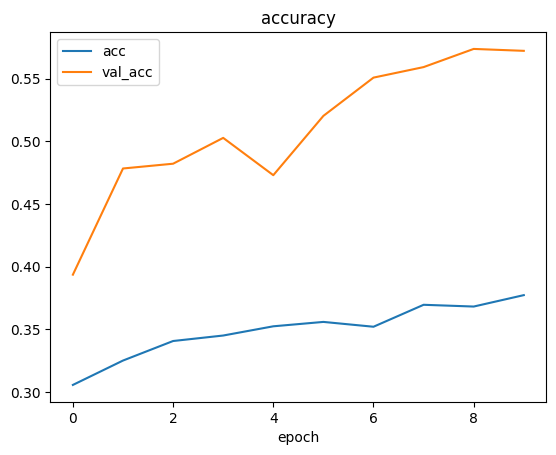

In [ ]:
plot_loss_curve(his_4)

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,1])
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(32,activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32,activation = "relu")(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_5 = tf.keras.Model(input,output)
model_5.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_5 = model_5.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_5",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
179/179 [==============================] - 13s 64ms/step - loss: 1.3647 - accuracy: 0.4431 - val_loss: 1.0220 - val_accuracy: 0.6552
Epoch 2/10
179/179 [==============================] - 10s 58ms/step - loss: 1.0162 - accuracy: 0.5636 - val_loss: 0.9351 - val_accuracy: 0.6735
Epoch 3/10
179/179 [==============================] - 11s 60ms/step - loss: 0.9089 - accuracy: 0.6124 - val_loss: 0.8183 - val_accuracy: 0.7231
Epoch 4/10
179/179 [==============================] - 11s 62ms/step - loss: 0.8760 - accuracy: 0.6155 - val_loss: 0.7757 - val_accuracy: 0.7193
Epoch 5/10
179/179 [==============================] - 11s 63ms/step - loss: 0.8502 - accuracy: 0.6329 - val_loss: 0.7089 - val_accuracy: 0.7475
Epoch 6/10
179/179 [==============================] - 10s 58ms/step - loss: 0.8213 - accuracy: 0.6453 - val_loss: 0.7374 - val_accuracy: 0.7300
Epoch 7/10
179/179 [==============================] - 11s 61ms/step - loss: 0.8127 - accuracy: 0.6443 - val_loss: 0.6587 - val_accuracy:

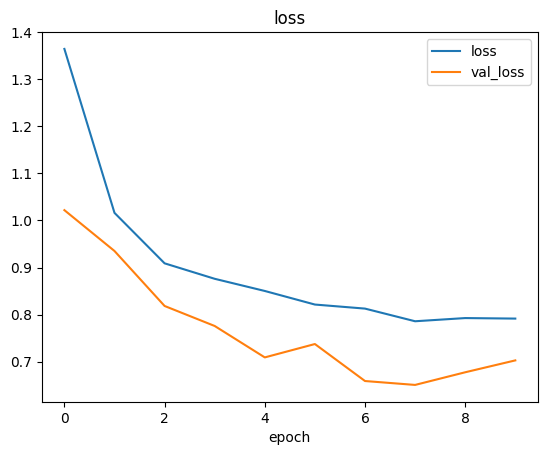

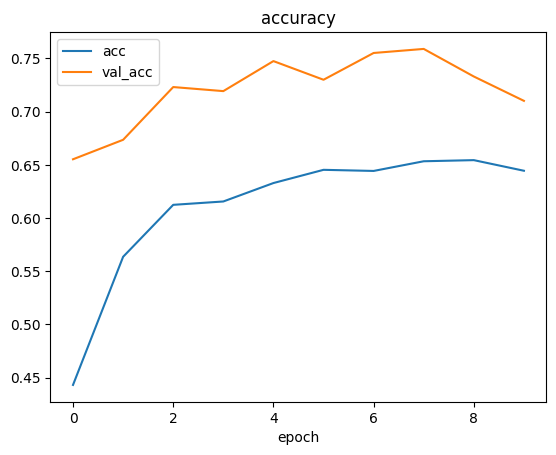

In [ ]:
plot_loss_curve(his_5)

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,1])
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(64,activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64,activation = "relu")(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_6 = tf.keras.Model(input,output)
model_6.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_6 = model_6.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_6",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
179/179 [==============================] - 12s 63ms/step - loss: 1.2602 - accuracy: 0.5448 - val_loss: 0.8031 - val_accuracy: 0.6941
Epoch 2/10
179/179 [==============================] - 11s 61ms/step - loss: 0.8123 - accuracy: 0.6322 - val_loss: 0.7464 - val_accuracy: 0.6453
Epoch 3/10
179/179 [==============================] - 10s 58ms/step - loss: 0.7246 - accuracy: 0.6870 - val_loss: 0.8985 - val_accuracy: 0.6621
Epoch 4/10
179/179 [==============================] - 11s 64ms/step - loss: 0.6661 - accuracy: 0.7146 - val_loss: 0.6207 - val_accuracy: 0.7506
Epoch 5/10
179/179 [==============================] - 11s 62ms/step - loss: 0.6736 - accuracy: 0.6938 - val_loss: 0.5878 - val_accuracy: 0.7460
Epoch 6/10
179/179 [==============================] - 11s 64ms/step - loss: 0.6300 - accuracy: 0.7171 - val_loss: 0.5454 - val_accuracy: 0.7635
Epoch 7/10
179/179 [==============================] - 10s 58ms/step - loss: 0.6212 - accuracy: 0.7339 - val_loss: 0.6098 - val_accuracy:

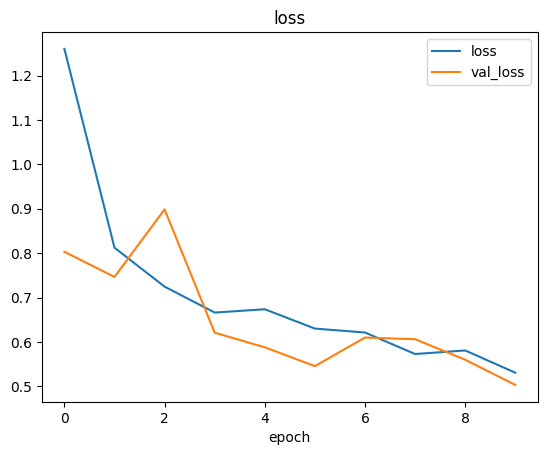

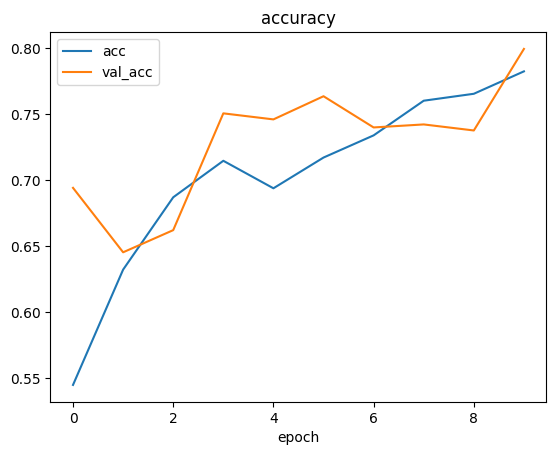

In [ ]:
plot_loss_curve(his_6)

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,1])
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(128,activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128,activation = "relu")(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_7 = tf.keras.Model(input,output)
model_7.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_7 = model_7.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_7",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
179/179 [==============================] - 12s 61ms/step - loss: 1.5885 - accuracy: 0.5357 - val_loss: 0.8494 - val_accuracy: 0.6842
Epoch 2/10
179/179 [==============================] - 11s 59ms/step - loss: 0.7817 - accuracy: 0.6703 - val_loss: 0.6667 - val_accuracy: 0.7368
Epoch 3/10
179/179 [==============================] - 10s 57ms/step - loss: 0.7009 - accuracy: 0.7076 - val_loss: 0.6958 - val_accuracy: 0.7338
Epoch 4/10
179/179 [==============================] - 12s 66ms/step - loss: 0.6344 - accuracy: 0.7428 - val_loss: 0.6321 - val_accuracy: 0.7490
Epoch 5/10
179/179 [==============================] - 11s 62ms/step - loss: 0.6066 - accuracy: 0.7526 - val_loss: 0.5349 - val_accuracy: 0.7757
Epoch 6/10
179/179 [==============================] - 10s 57ms/step - loss: 0.5243 - accuracy: 0.7897 - val_loss: 0.6840 - val_accuracy: 0.7376
Epoch 7/10
179/179 [==============================] - 11s 61ms/step - loss: 0.5525 - accuracy: 0.7796 - val_loss: 0.5196 - val_accuracy:

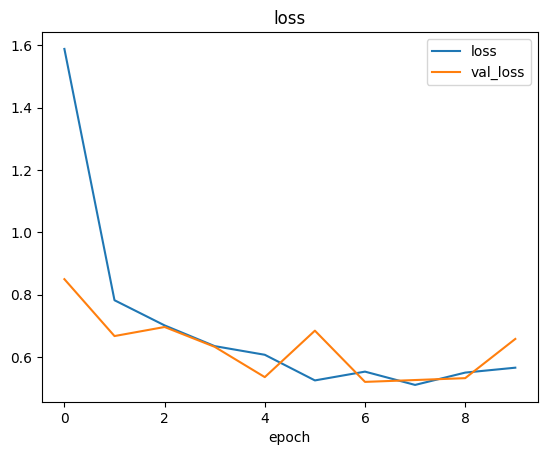

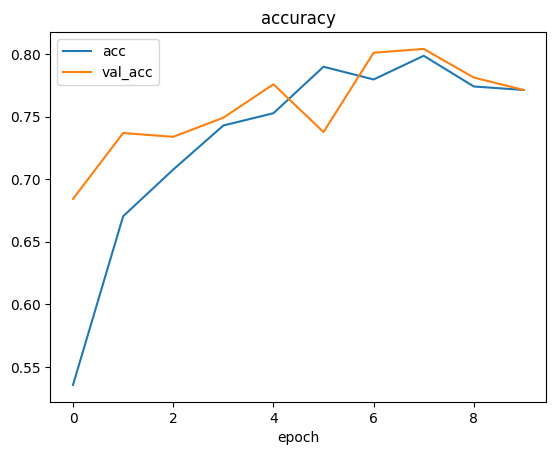

In [ ]:
plot_loss_curve(his_7)

In [ ]:
input = tf.keras.layers.Input(shape= [224,224,1])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64,activation = "relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(4,activation = "softmax")(x)

model_8 = tf.keras.Model(input,output)
model_8.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics= ["accuracy"]
                )
his_8 = model_8.fit(train_data,
                    epochs = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_8",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
179/179 [==============================] - 562s 3s/step - loss: 0.9785 - accuracy: 0.6415 - val_loss: 0.5423 - val_accuracy: 0.7788
Epoch 2/10
179/179 [==============================] - 598s 3s/step - loss: 0.4754 - accuracy: 0.8090 - val_loss: 0.4110 - val_accuracy: 0.8497
Epoch 3/10
179/179 [==============================] - 605s 3s/step - loss: 0.3398 - accuracy: 0.8617 - val_loss: 0.2681 - val_accuracy: 0.8856
Epoch 4/10
179/179 [==============================] - 582s 3s/step - loss: 0.2448 - accuracy: 0.9034 - val_loss: 0.2276 - val_accuracy: 0.9100
Epoch 5/10
179/179 [==============================] - 554s 3s/step - loss: 0.1945 - accuracy: 0.9186 - val_loss: 0.2288 - val_accuracy: 0.9077
Epoch 6/10
179/179 [==============================] - 590s 3s/step - loss: 0.1590 - accuracy: 0.9356 - val_loss: 0.1972 - val_accuracy: 0.9283
Epoch 7/10
179/179 [==============================] - 584s 3s/step - loss: 0.1279 - accuracy: 0.9475 - val_loss: 0.1653 - val_accuracy: 0.9443

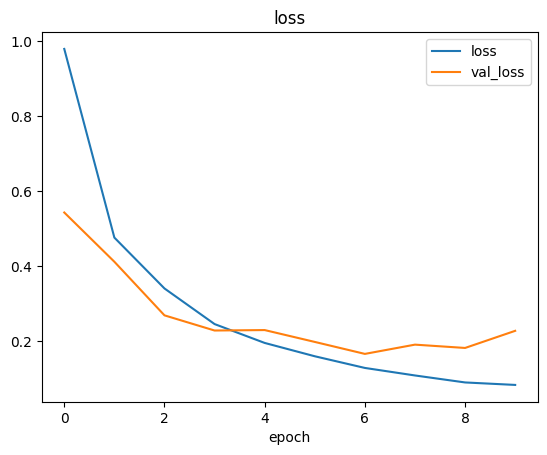

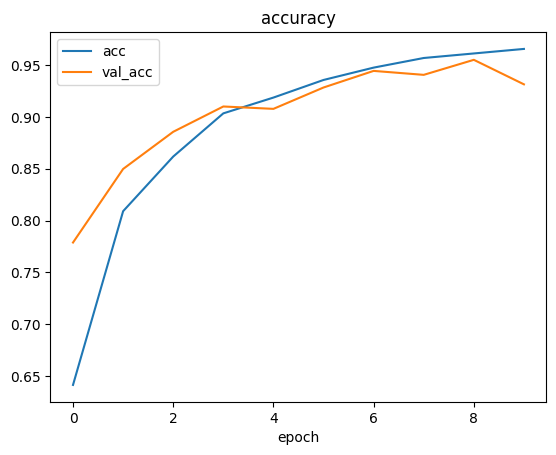

In [ ]:
plot_loss_curve(his_8)

In [ ]:
y_prob = model_8.predict(test_data)

41/41 [==============================] - 31s 750ms/step


In [ ]:
y_pred = y_prob.argmax(axis = -1)
y_pred

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
test_label = []

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           color_mode = "grayscale",
                                                                           label_mode = "categorical",
                                                                           image_size = [224,224],
                                                                           shuffle = False
                                                                           )

Found 1311 files belonging to 4 classes.


In [ ]:
for i,l in test_dataset.unbatch():
  test_label.append(l.numpy().argmax())

In [ ]:
test_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


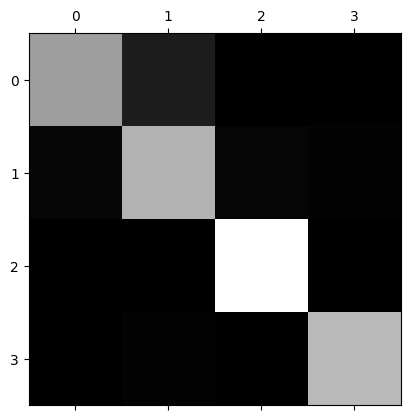

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label,y_pred)
plt.matshow(cm,cmap = plt.cm.gray)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(test_label,y_pred,output_dict= True)

In [ ]:
new_cr = {}
for k,v in cr.items():
  if k == "accuracy":
    break
  else:
    new_cr[class_names[int(k)]] = v["f1-score"]

In [ ]:
new_cr

{'glioma': 0.8912655971479501,
 'meningioma': 0.8829953198127924,
 'notumor': 0.9902200488997555,
 'pituitary': 0.9767441860465117}

In [ ]:
f1_score_dataframe = pd.DataFrame(new_cr,index=["f1_score"]).T
f1_score_dataframe

,f1_score
glioma,0.891266
meningioma,0.882995
notumor,0.990220
pituitary,0.976744


In [ ]:
new_f1_score_dataframe = f1_score_dataframe.sort_values(by=["f1_score"],ascending = True)

<BarContainer object of 4 artists>

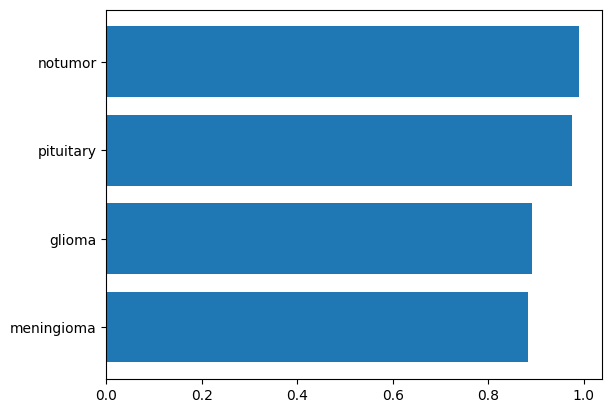

In [ ]:
plt.barh(new_f1_score_dataframe.index[:],new_f1_score_dataframe["f1_score"])

In [ ]:
all_file = []
list_files = test_dataset.list_files("/content/Testing/*/*.jpg",
                                     shuffle = False
                                     )
for i in list_files:
  all_file.append(i.numpy())

In [ ]:
all_file[:10]

[b'/content/Testing/glioma/Te-glTr_0000.jpg',
 b'/content/Testing/glioma/Te-glTr_0001.jpg',
 b'/content/Testing/glioma/Te-glTr_0002.jpg',
 b'/content/Testing/glioma/Te-glTr_0003.jpg',
 b'/content/Testing/glioma/Te-glTr_0004.jpg',
 b'/content/Testing/glioma/Te-glTr_0005.jpg',
 b'/content/Testing/glioma/Te-glTr_0006.jpg',
 b'/content/Testing/glioma/Te-glTr_0007.jpg',
 b'/content/Testing/glioma/Te-glTr_0008.jpg',
 b'/content/Testing/glioma/Te-glTr_0009.jpg']

In [ ]:
dataframe = pd.DataFrame({
    "file_list":all_file,
    "class_name":[class_names[i] for i in test_label],
    "pred_class_name":[class_names[i] for i in y_pred],
    "y_label":test_label,
    "y_prob":y_prob.max(-1),
    "y_pred":y_pred,

})
dataframe

,file_list,class_name,pred_class_name,y_label,y_prob,y_pred
0,b'/content/Testing/glioma/Te-glTr_0000.jpg',glioma,glioma,0,0.999967,0
1,b'/content/Testing/glioma/Te-glTr_0001.jpg',glioma,glioma,0,0.999297,0
2,b'/content/Testing/glioma/Te-glTr_0002.jpg',glioma,glioma,0,0.999392,0
3,b'/content/Testing/glioma/Te-glTr_0003.jpg',glioma,meningioma,0,0.999768,1
4,b'/content/Testing/glioma/Te-glTr_0004.jpg',glioma,glioma,0,0.998501,0
...,...,...,...,...,...,...
1306,b'/content/Testing/pituitary/Te-pi_0295.jpg',pituitary,pituitary,3,1.000000,3
1307,b'/content/Testing/pituitary/Te-pi_0296.jpg',pituitary,pituitary,3,0.999690,3
1308,b'/content/Testing/pituitary/Te-pi_0297.jpg',pituitary,pituitary,3,0.999946,3
1309,b'/content/Testing/pituitary/Te-pi_0298.jpg',pituitary,pituitary,3,0.999963,3


In [ ]:
dataframe["correct"] = dataframe["y_label"] == dataframe["y_pred"]
dataframe

,file_list,class_name,pred_class_name,y_label,y_prob,y_pred,correct
0,b'/content/Testing/glioma/Te-glTr_0000.jpg',glioma,glioma,0,0.999967,0,True
1,b'/content/Testing/glioma/Te-glTr_0001.jpg',glioma,glioma,0,0.999297,0,True
2,b'/content/Testing/glioma/Te-glTr_0002.jpg',glioma,glioma,0,0.999392,0,True
3,b'/content/Testing/glioma/Te-glTr_0003.jpg',glioma,meningioma,0,0.999768,1,False
4,b'/content/Testing/glioma/Te-glTr_0004.jpg',glioma,glioma,0,0.998501,0,True
...,...,...,...,...,...,...,...
1306,b'/content/Testing/pituitary/Te-pi_0295.jpg',pituitary,pituitary,3,1.000000,3,True
1307,b'/content/Testing/pituitary/Te-pi_0296.jpg',pituitary,pituitary,3,0.999690,3,True
1308,b'/content/Testing/pituitary/Te-pi_0297.jpg',pituitary,pituitary,3,0.999946,3,True
1309,b'/content/Testing/pituitary/Te-pi_0298.jpg',pituitary,pituitary,3,0.999963,3,True


In [ ]:
new_dataframe = dataframe[dataframe["correct"] != True].sort_values(by = ["y_prob"],ascending = False)
new_dataframe

,file_list,class_name,pred_class_name,y_label,y_prob,y_pred,correct
314,b'/content/Testing/meningioma/Te-me_0014.jpg',meningioma,notumor,1,0.999997,2,False
30,b'/content/Testing/glioma/Te-gl_0030.jpg',glioma,meningioma,0,0.999993,1,False
46,b'/content/Testing/glioma/Te-gl_0046.jpg',glioma,meningioma,0,0.999972,1,False
445,b'/content/Testing/meningioma/Te-me_0145.jpg',meningioma,notumor,1,0.999962,2,False
410,b'/content/Testing/meningioma/Te-me_0110.jpg',meningioma,notumor,1,0.999962,2,False
...,...,...,...,...,...,...,...
273,b'/content/Testing/glioma/Te-gl_0273.jpg',glioma,pituitary,0,0.526099,3,False
250,b'/content/Testing/glioma/Te-gl_0250.jpg',glioma,meningioma,0,0.515797,1,False
1024,b'/content/Testing/pituitary/Te-pi_0013.jpg',pituitary,meningioma,3,0.513344,1,False
580,b'/content/Testing/meningioma/Te-me_0280.jpg',meningioma,glioma,1,0.507104,0,False


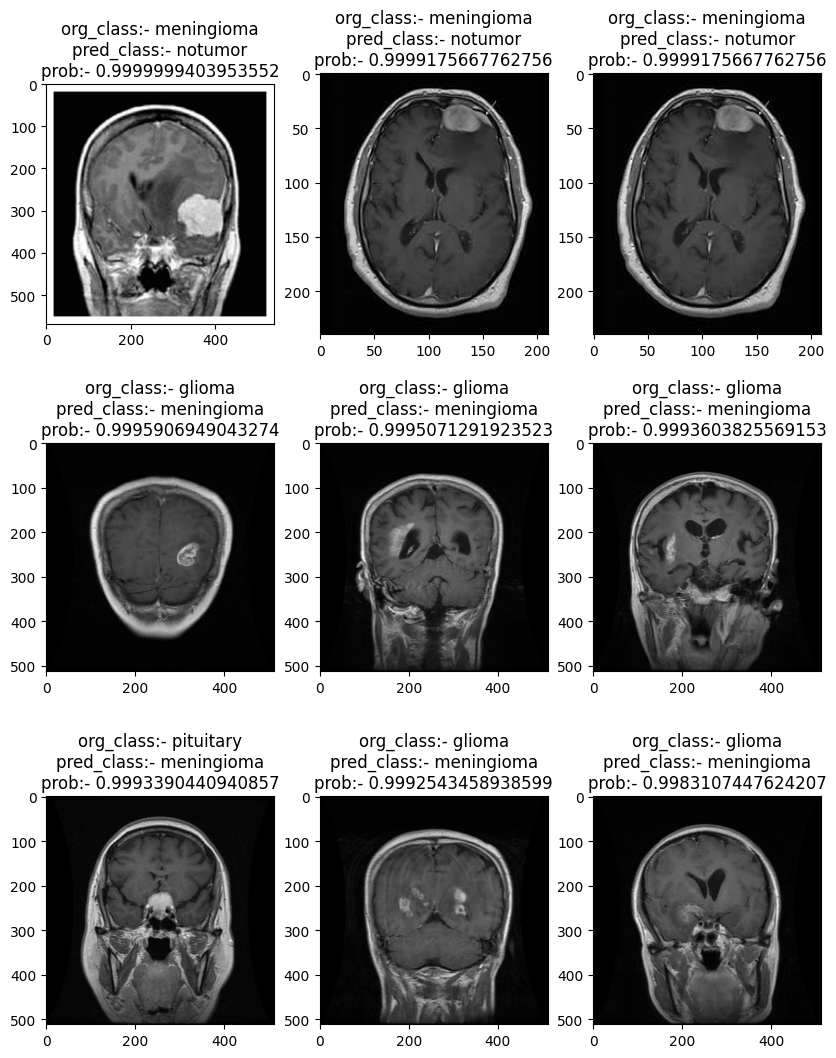

In [38]:
plt.figure(figsize=[10,13])
for i,row in enumerate(new_dataframe[:9].itertuples()):
  plt.subplot(3,3,i+1)
  img = tf.io.read_file(row[1])
  img = tf.io.decode_image(img,channels = 3)
  plt.imshow(img)
  plt.title(f"org_class:- {row[2]}\npred_class:- {row[3]}\nprob:- {row[5]}")